# Analyzing the Traction of ChatGPT Content on Twitter
### Priyanka Adhikari, Ruchira Banerjee, Nidhi Bendre

We first imported the needed modules as shown below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from afinn import Afinn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

/Users/priyankaadhikari/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# Inspect the data

We then imported our CSV file from Kaggle (link: https://www.kaggle.com/datasets/tariqsays/chatgpt-twitter-dataset) into a pandas dataframe.

In [2]:
df_twitter = pd.read_csv('chatgpt1.csv')
df_twitter

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1.617160e+18,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,5,0,1.617160e+18,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
1,2023-01-22 13:44:39+00:00,1.617160e+18,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,5,0,1.617150e+18,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0
2,2023-01-22 13:44:44+00:00,1.617160e+18,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1.617160e+18,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
3,2023-01-22 13:44:49+00:00,1.617160e+18,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,2,0,1.617160e+18,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0
4,2023-01-22 13:44:52+00:00,1.617160e+18,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,4,0,1.617160e+18,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,2023-01-24 06:57:56+00:00,1.617780e+18,"#ChatGPT ist ein #Chatbot, der durch künstlich...",HorstKrieger,https://twitter.com/HorstKrieger/status/161777...,https://twitter.com/HorstKrieger,"['https://lnkd.in/dzHbz5-z', 'https://lnkd.in/...","['https://t.co/qxUJZinuNO', 'https://t.co/lFZD...",0,0,0,0,1.617780e+18,de,"<a href=""http://www.linkedin.com/"" rel=""nofoll...",NaN,NaN,NaN,"['#ChatGPT', '#Chatbot,', '#KI', '#AI', '#Dial...",6
49997,2023-01-24 06:57:59+00:00,1.617780e+18,@r8r Ich hab mal die AI dazu befragt (ChatGPT)...,werpu,https://twitter.com/werpu/status/1617778726393...,https://twitter.com/werpu,NaN,NaN,0,0,0,0,1.617770e+18,de,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,"[User(username='r8r', id=15451529, displayname...",[],0
49998,2023-01-24 06:58:00+00:00,1.617780e+18,5 minuti di #chatGPT e ho capito che apprende ...,marcopiccinini,https://twitter.com/marcopiccinini/status/1617...,https://twitter.com/marcopiccinini,NaN,NaN,0,0,0,0,1.617780e+18,it,"<a href=""http://twitter.com/download/iphone"" r...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,['#chatGPT'],1
49999,2023-01-24 06:58:01+00:00,1.617780e+18,Portland Shop Uses ChatGPT To Tell Family Stor...,EuniceNyandat,https://twitter.com/EuniceNyandat/status/16177...,https://twitter.com/EuniceNyandat,['https://drumup.io/s/DkswB6'],['https://t.co/rzGvr6yTOc'],0,0,0,0,1.617780e+18,en,"<a href=""https://drumup.io"" rel=""nofollow"">dru...",NaN,NaN,NaN,[],0


We then printed out dtype, null-count, and statistical information about the dataframe using .info() and .describe().

In [3]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Datetime        50001 non-null  object 
 1   Tweet Id        50001 non-null  float64
 2   Text            50001 non-null  object 
 3   Username        50001 non-null  object 
 4   Permalink       50001 non-null  object 
 5   User            50001 non-null  object 
 6   Outlinks        19942 non-null  object 
 7   CountLinks      19942 non-null  object 
 8   ReplyCount      50001 non-null  int64  
 9   RetweetCount    50001 non-null  int64  
 10  LikeCount       50001 non-null  int64  
 11  QuoteCount      50001 non-null  int64  
 12  ConversationId  50001 non-null  float64
 13  Language        50001 non-null  object 
 14  Source          50001 non-null  object 
 15  Media           9502 non-null   object 
 16  QuotedTweet     3563 non-null   object 
 17  MentionedUsers  17169 non-null 

In [4]:
df_twitter.describe()

,Tweet Id,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,hastag_counts
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,5.000100e+04,50001.000000
mean,1.617493e+18,0.929141,1.498510,9.696326,0.219536,1.617205e+18,0.783304
std,1.725789e+14,23.251710,46.030058,313.524215,10.356329,1.005073e+16,1.975040
min,1.617160e+18,0.000000,0.000000,0.000000,0.000000,6.493610e+17,0.000000
25%,1.617350e+18,0.000000,0.000000,0.000000,0.000000,1.617300e+18,0.000000
50%,1.617530e+18,0.000000,0.000000,0.000000,0.000000,1.617500e+18,0.000000
75%,1.617620e+18,1.000000,0.000000,2.000000,0.000000,1.617610e+18,1.000000
max,1.617780e+18,3098.000000,6815.000000,56073.000000,1947.000000,1.617780e+18,28.000000


# Visualize the data

Here we visualize the like count distribution of our dataset.

Text(0.5, 1.0, 'distribution of like count')

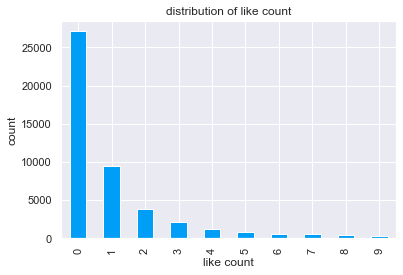

In [5]:
#Visualizing like count distribution
scores = df_twitter['LikeCount'].value_counts().sort_index().head(10)
scores.plot.bar(color="#009ef7")
plt.xlabel('like count')
plt.ylabel('count')
plt.title('distribution of like count')


# Clean and prepare data

We removed all Tweets with non_English text and a non-positive number of likes (due to the skewed nature of our data).

In [6]:
df_twitter = df_twitter[df_twitter['Language'] == 'en']

In [7]:
df_twitter = df_twitter[df_twitter['LikeCount'] > 0]

We calculated a Tweet's Sentiment Score using the Afinn library and then added a column to hold the observations' (Tweets') Sentiment Scores.

In [8]:
afinn = Afinn(language='en')
text_list = list(df_twitter['Text'])
score_list = []
for text in text_list:
    score = afinn.score(text)
    score_list.append(score)
df_twitter['SentimentScore'] = score_list

We changed certain columns as their correct datatypes, as needed. 

In [9]:
for column in ['Text','Media','QuotedTweet','MentionedUsers','hashtag']:
    df_twitter[column]  = df_twitter[column].astype('string')
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14563 entries, 1 to 49967
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Datetime        14563 non-null  object 
 1   Tweet Id        14563 non-null  float64
 2   Text            14563 non-null  string 
 3   Username        14563 non-null  object 
 4   Permalink       14563 non-null  object 
 5   User            14563 non-null  object 
 6   Outlinks        4429 non-null   object 
 7   CountLinks      4429 non-null   object 
 8   ReplyCount      14563 non-null  int64  
 9   RetweetCount    14563 non-null  int64  
 10  LikeCount       14563 non-null  int64  
 11  QuoteCount      14563 non-null  int64  
 12  ConversationId  14563 non-null  float64
 13  Language        14563 non-null  object 
 14  Source          14563 non-null  object 
 15  Media           3090 non-null   string 
 16  QuotedTweet     1235 non-null   string 
 17  MentionedUsers  6096 non-null   stri

# Create new columns

We created new columns to denote whether or not there is media or a quoted Tweet present in the observation.
We also created new columns to hold the number of mentioned users and characters in a Tweet.
We renamed the column for hashtag counts to preserve uniformity in column names.

In [10]:
# creating Media Presence 
df_twitter['MediaPresence'] = df_twitter['Media'].notna().astype(int)

# creating QuotedTweetPresence 
df_twitter['QuotedTweetPresence'] = df_twitter['QuotedTweet'].notna().astype(int)

# creating MentionedUsersCount
df_twitter['MentionedUsersCount'] = df_twitter['MentionedUsers'].str.count('user')
df_twitter['MentionedUsersCount'] = df_twitter['MentionedUsersCount'].fillna(0)

# creating TextLength
df_twitter['TextLength'] = df_twitter['Text'].str.len()

# creating new column for HashtagCount  
df_twitter["HashtagCount"] = df_twitter["hastag_counts"]

df_twitter

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,...,QuotedTweet,MentionedUsers,hashtag,hastag_counts,SentimentScore,MediaPresence,QuotedTweetPresence,MentionedUsersCount,TextLength,HashtagCount
1,2023-01-22 13:44:39+00:00,1.617160e+18,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,...,<NA>,"[User(username='AlexandrovnaIng', id=282705900...",[],0,2.0,0,0,1,96,0
3,2023-01-22 13:44:49+00:00,1.617160e+18,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,...,https://twitter.com/agadmator/status/161715501...,<NA>,[],0,0.0,0,1,0,50,0
7,2023-01-22 13:45:04+00:00,1.617160e+18,@SWENGDAD There is repetitive work in every jo...,xlr8harder,https://twitter.com/xlr8harder/status/16171563...,https://twitter.com/xlr8harder,NaN,NaN,1,0,...,<NA>,"[User(username='SWENGDAD', id=1460452950875193...",[],0,0.0,0,0,1,170,0
8,2023-01-22 13:45:06+00:00,1.617160e+18,I created a fictional jewelry brand using Chat...,Kosuke_dazo,https://twitter.com/Kosuke_dazo/status/1617156...,https://twitter.com/Kosuke_dazo,['https://oriori.my.canva.site/'],['https://t.co/gtWdNZ0laM'],0,1,...,<NA>,<NA>,"['#ChatGPT', '#midjourney']",2,0.0,1,0,0,136,2
15,2023-01-22 13:45:15+00:00,1.617160e+18,🤯 #ChatGPT writes excel formulas! #MicrosoftE...,JakeMillerTech,https://twitter.com/JakeMillerTech/status/1617...,https://twitter.com/JakeMillerTech,['https://twitter.com/mtholfsen/status/1616588...,['https://t.co/aBiphFuQWM'],0,6,...,https://twitter.com/mtholfsen/status/161658879...,<NA>,"['#ChatGPT', '#MicrosoftEDU', '#MIEExpert', '#...",11,0.0,0,1,0,181,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49930,2023-01-24 06:55:21+00:00,1.617780e+18,Microsoft Corp. is making a $10 billion invest...,WEXTinVentures,https://twitter.com/WEXTinVentures/status/1617...,https://twitter.com/WEXTinVentures,NaN,NaN,0,0,...,<NA>,<NA>,"['#Microsoft', '#OpenAI', '#Investment', '#Cha...",12,0.0,1,0,0,291,12
49931,2023-01-24 06:55:22+00:00,1.617780e+18,ChatGPT has entered the poll 🤖 https://t.co/iV...,robhope,https://twitter.com/robhope/status/16177780662...,https://twitter.com/robhope,['https://twitter.com/robhope/status/161757085...,['https://t.co/iVVURvE7TA'],2,1,...,https://twitter.com/robhope/status/16175708513...,<NA>,[],0,0.0,1,1,0,78,0
49948,2023-01-24 06:55:47+00:00,1.617780e+18,I just published Will ChatGPT Take Our Job As ...,merterkal,https://twitter.com/merterkal/status/161777817...,https://twitter.com/merterkal,['https://link.medium.com/vG7sLWhlQwb'],['https://t.co/1CvIqOCSwe'],0,3,...,<NA>,<NA>,[],0,0.0,0,0,0,86,0
49954,2023-01-24 06:56:10+00:00,1.617780e+18,Get up and start integrating AI in your code i...,inmicahineworks,https://twitter.com/inmicahineworks/status/161...,https://twitter.com/inmicahineworks,NaN,NaN,0,1,...,<NA>,<NA>,"['#Python', '#javascript', '#programming', '#p...",5,0.0,1,0,0,171,5


Then, we created a new column to hold the category of Traction level that the observation received. The level of traction was determined by the observations number of likes (LikeCount). Tweets with 0-3 (inclusive) likes were deemed to receive "Little to no traction", followed by 4-6 (inclusive) likes deeming the Tweet to receive "Moderate traction", and finally 7 or more likes labeling the Tweet as one with "High traction".

In [11]:
traction_ls = []
for index, row in df_twitter.iterrows():
    
    # use like count to categorize traction levels
    if abs(row['LikeCount']) in range(0,4):
        traction_ls.append('Little to no traction')
    elif abs(row['LikeCount']) in range(4,7):
        traction_ls.append('Moderate traction')
    elif abs(row['LikeCount']) >= 7:
        traction_ls.append('High traction')
    else:
        traction_ls.append('N/A')
        
df_twitter['traction'] = traction_ls
df_twitter

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,...,MentionedUsers,hashtag,hastag_counts,SentimentScore,MediaPresence,QuotedTweetPresence,MentionedUsersCount,TextLength,HashtagCount,traction
1,2023-01-22 13:44:39+00:00,1.617160e+18,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,...,"[User(username='AlexandrovnaIng', id=282705900...",[],0,2.0,0,0,1,96,0,Moderate traction
3,2023-01-22 13:44:49+00:00,1.617160e+18,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,...,<NA>,[],0,0.0,0,1,0,50,0,Little to no traction
7,2023-01-22 13:45:04+00:00,1.617160e+18,@SWENGDAD There is repetitive work in every jo...,xlr8harder,https://twitter.com/xlr8harder/status/16171563...,https://twitter.com/xlr8harder,NaN,NaN,1,0,...,"[User(username='SWENGDAD', id=1460452950875193...",[],0,0.0,0,0,1,170,0,Little to no traction
8,2023-01-22 13:45:06+00:00,1.617160e+18,I created a fictional jewelry brand using Chat...,Kosuke_dazo,https://twitter.com/Kosuke_dazo/status/1617156...,https://twitter.com/Kosuke_dazo,['https://oriori.my.canva.site/'],['https://t.co/gtWdNZ0laM'],0,1,...,<NA>,"['#ChatGPT', '#midjourney']",2,0.0,1,0,0,136,2,Little to no traction
15,2023-01-22 13:45:15+00:00,1.617160e+18,🤯 #ChatGPT writes excel formulas! #MicrosoftE...,JakeMillerTech,https://twitter.com/JakeMillerTech/status/1617...,https://twitter.com/JakeMillerTech,['https://twitter.com/mtholfsen/status/1616588...,['https://t.co/aBiphFuQWM'],0,6,...,<NA>,"['#ChatGPT', '#MicrosoftEDU', '#MIEExpert', '#...",11,0.0,0,1,0,181,11,High traction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49930,2023-01-24 06:55:21+00:00,1.617780e+18,Microsoft Corp. is making a $10 billion invest...,WEXTinVentures,https://twitter.com/WEXTinVentures/status/1617...,https://twitter.com/WEXTinVentures,NaN,NaN,0,0,...,<NA>,"['#Microsoft', '#OpenAI', '#Investment', '#Cha...",12,0.0,1,0,0,291,12,Little to no traction
49931,2023-01-24 06:55:22+00:00,1.617780e+18,ChatGPT has entered the poll 🤖 https://t.co/iV...,robhope,https://twitter.com/robhope/status/16177780662...,https://twitter.com/robhope,['https://twitter.com/robhope/status/161757085...,['https://t.co/iVVURvE7TA'],2,1,...,<NA>,[],0,0.0,1,1,0,78,0,Little to no traction
49948,2023-01-24 06:55:47+00:00,1.617780e+18,I just published Will ChatGPT Take Our Job As ...,merterkal,https://twitter.com/merterkal/status/161777817...,https://twitter.com/merterkal,['https://link.medium.com/vG7sLWhlQwb'],['https://t.co/1CvIqOCSwe'],0,3,...,<NA>,[],0,0.0,0,0,0,86,0,Little to no traction
49954,2023-01-24 06:56:10+00:00,1.617780e+18,Get up and start integrating AI in your code i...,inmicahineworks,https://twitter.com/inmicahineworks/status/161...,https://twitter.com/inmicahineworks,NaN,NaN,0,1,...,<NA>,"['#Python', '#javascript', '#programming', '#p...",5,0.0,1,0,0,171,5,Little to no traction


We then viewed the distribution of traction levels in the dataframe.

In [12]:
df_twitter['traction']  = df_twitter['traction'].astype('category')
df_twitter['traction'].value_counts()

traction
Little to no traction    10007
High traction             2903
Moderate traction         1653
Name: count, dtype: int64

# Drop Irrelevant Columns

We only kept the columns we were directly using, and dropped the rest.

In [13]:
df_twitter = df_twitter[["TextLength", "SentimentScore", "MediaPresence", "QuotedTweetPresence", 
                         "MentionedUsersCount", "HashtagCount", "traction"]]
df_twitter

,TextLength,SentimentScore,MediaPresence,QuotedTweetPresence,MentionedUsersCount,HashtagCount,traction
1,96,2.0,0,0,1,0,Moderate traction
3,50,0.0,0,1,0,0,Little to no traction
7,170,0.0,0,0,1,0,Little to no traction
8,136,0.0,1,0,0,2,Little to no traction
15,181,0.0,0,1,0,11,High traction
...,...,...,...,...,...,...,...
49930,291,0.0,1,0,0,12,Little to no traction
49931,78,0.0,1,1,0,0,Little to no traction
49948,86,0.0,0,0,0,0,Little to no traction
49954,171,0.0,1,0,0,5,Little to no traction


# Model 1: K-NN Classification

Here we develop our K-NN Classification model. We first divide the data into the input 'X' and the labels 'y'.


Then, we split the data into training (70%) and testing (30%) datasets, ensured reproducibility by setting random_state to 7 and stratifying y.


Finally, we built the k-nn model using n_neighbors=7 (temporarily) and fit our model to the training data.

In [14]:
x_feat_list = ["TextLength", "SentimentScore", "MediaPresence", "QuotedTweetPresence", "MentionedUsersCount", 
               "HashtagCount"]

X        = df_twitter.loc[:, x_feat_list] # input variables
y        = df_twitter['traction'] # target variable

# initialize training and test sets
X_train, X_test, y_train, y_test = train_test_split( 
                                                    X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7, # reproduce the results
                                                    stratify=y 
                                                   ) 

# build the k-nn model
knn = KNeighborsClassifier(n_neighbors = 7) #initialize classifier and set the number of neighbors


knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

We then tested different values for n_neighbors by looping through every other value from 3-50 and plotted the accuracy results.

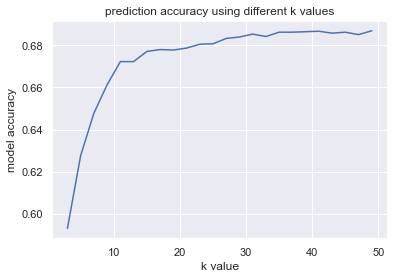

In [15]:
predictions = {}

for k in range(3, 50, 2): # increment k by 2
    knn = KNeighborsClassifier(n_neighbors = k) # initialize the classifier and set the number of neighbors
    knn.fit(X_train, y_train) # fit model on training data
    predictions[k] = knn.score(X_test, y_test) # form predictions
sns.lineplot(x=predictions.keys(), y=predictions.values())
plt.title('prediction accuracy using different k values')
plt.xlabel('k value')
plt.ylabel('model accuracy')
plt.show()

We then refit, trained the model, and printed the classification report for the resulting best value for n_neighbors, which was 49.

In [16]:
knn_7 = KNeighborsClassifier(n_neighbors = 49) # initialize the classifier and set the number of neighbors
knn_7.fit(X_train, y_train)
y_pred = knn_7.predict(X_test)

print(classification_report(y_test, y_pred))

                       precision    recall  f1-score   support

        High traction       0.44      0.01      0.02       871
Little to no traction       0.69      1.00      0.81      3002
    Moderate traction       0.00      0.00      0.00       496

             accuracy                           0.69      4369
            macro avg       0.38      0.34      0.28      4369
         weighted avg       0.56      0.69      0.56      4369



/Users/priyankaadhikari/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/priyankaadhikari/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/priyankaadhikari/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

# Model 2: Random Forest Classification

We then built the Random Forest Classifier. First, we divided the data into the input 'X' and the labels 'y'.

Then, we split the data into training (70%) and testing (30%) datasets, ensured reproducibility by setting random_state to 7 and stratifying y.

In [17]:
X = df_twitter[["TextLength", "SentimentScore", "MediaPresence", "QuotedTweetPresence", "MentionedUsersCount", 
               "HashtagCount"]] # input variables
y = df_twitter['traction'] # target variable

X_train, X_test, y_train, y_test = train_test_split(X,              # input features
                                                    y,              # target variable label
                                                    test_size=0.3,  # set aside 30% of the data as the test set
                                                    random_state=7, # reproduce the results
                                                    stratify=y      # preserve the distribution of the labels
                                                   )

We created copies of the training and testing datasets for our input variables. We then normalized and scaled the input variables, which were all numeric.

In [18]:
X_train = X_train.copy()
X_test  = X_test.copy()

# normalize the numeric features
scaler = StandardScaler()
scaler.fit(X_train[["TextLength", "SentimentScore", "MediaPresence", "QuotedTweetPresence", "MentionedUsersCount", 
               "HashtagCount"]])

# scale the training data
X_train[["TextLength", "SentimentScore", "MediaPresence", "QuotedTweetPresence", "MentionedUsersCount", 
        "HashtagCount"]] = scaler.transform(X_train[["TextLength", "SentimentScore", "MediaPresence", 
                                                    "QuotedTweetPresence", "MentionedUsersCount", "HashtagCount"]]) 

Then, we used GridSearchCV to optimize our parameters and print out the best parameters and accuracy score.

In [19]:
rfc = RandomForestClassifier(random_state = 3)

forest_params = {'n_estimators': [300, 400, 500, 750, 1000], 'max_depth': list(range(10, 15))}

clf = GridSearchCV(estimator = rfc, param_grid = forest_params, cv = 5, scoring='accuracy')

clf.fit(X_train, y_train)

print(clf.best_params_)

print(clf.best_score_)

{'max_depth': 10, 'n_estimators': 300}
0.6848150467262282


Then we printed the classification report below, for the best classifier (using the tuned parameter values)

In [20]:
print(classification_report(y_test, clf.best_estimator_.predict(X_test)))

                       precision    recall  f1-score   support

        High traction       0.29      0.03      0.05       871
Little to no traction       0.69      0.98      0.81      3002
    Moderate traction       0.05      0.00      0.00       496

             accuracy                           0.68      4369
            macro avg       0.34      0.34      0.29      4369
         weighted avg       0.54      0.68      0.57      4369



Finally, to help us visualize our classifier, we plotted a Confusion Matrix followed by a feature important graph. 

Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

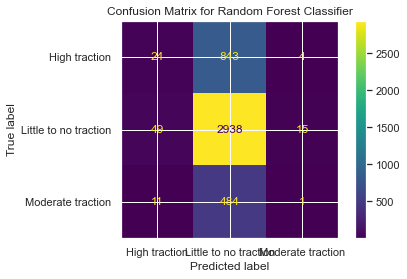

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, clf.best_estimator_.predict(X_test), labels=clf.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
display.plot()
plt.title("Confusion Matrix for Random Forest Classifier")

In [22]:
feature_importance = clf.best_estimator_.feature_importances_
feature_importance

array([0.38525982, 0.19125071, 0.05875969, 0.02912618, 0.17449491,
       0.16110869])

Text(0.5, 1.0, 'Feature Importance to Classify Traction Level')

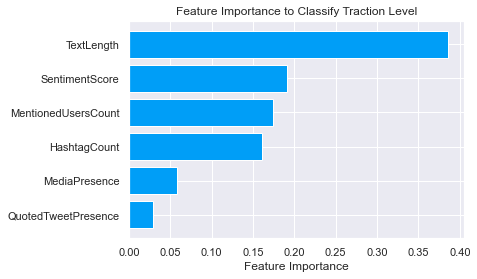

In [23]:
# plot feature importance graph
sorted_idx = clf.best_estimator_.feature_importances_.argsort()
features = ["TextLength", "SentimentScore", "MediaPresence", "QuotedTweetPresence", "MentionedUsersCount",
            "HashtagCount"]
sorted_features = [features[i] for i in sorted_idx]

plt.barh(sorted_features, clf.best_estimator_.feature_importances_[sorted_idx],color='#009EF7')
plt.xlabel("Feature Importance")
plt.title("Feature Importance to Classify Traction Level")

# Model 3: Support Vector Machine

We then built the SVM model. First, we divided the data into the input 'X' and the labels 'y'.


Then, we split the data into training (70%) and testing (30%) datasets, ensured reproducibility by setting random_state to 7 and stratifying y.


We then created copies of the input variables training/testing datasets.


Following this, we normalized and scaled the training data, which were all numeric features.


#### Initializing the Model
Next, we initialized the classifier, fit the training data, and scaled the testing data. This was followed by creating the predictions for the test data, setting the parameter grid to input into GridSearchCV for optimizing our parameters, and creating our final model with the optimized parameters.

In [24]:
# set the data
X = df_twitter[["TextLength", "SentimentScore", "MediaPresence", "QuotedTweetPresence", "MentionedUsersCount", 
               "HashtagCount"]] # input variables
y = df_twitter['traction'] # target variable

# split the data into training/testing partitions
X_train, X_test, y_train, y_test = train_test_split(X,              # input features
                                                    y,              # target variable
                                                    test_size = 0.3,  # set aside 30% of the data as the test set
                                                    random_state = 7, #r eproduce the results
                                                    stratify = y      # preserve the distribution of the labels
                                                   )

X_train = X_train.copy()
X_test  = X_test.copy()

# normalize the numeric features
scaler = StandardScaler()
scaler.fit(X_train[["TextLength", "SentimentScore", "MediaPresence", "QuotedTweetPresence", "MentionedUsersCount", 
               "HashtagCount"]])

# scale the training data
X_train[["TextLength", "SentimentScore", "MediaPresence", "QuotedTweetPresence", "MentionedUsersCount", 
        "HashtagCount"]] = scaler.transform(X_train[["TextLength", "SentimentScore", "MediaPresence", 
                                                    "QuotedTweetPresence", "MentionedUsersCount", "HashtagCount"]]) 


# initialize the classifier
svm = SVC() 
# fit the data
svm.fit(X_train, y_train) 

# scale the new/test data
X_test[["TextLength", "SentimentScore", "MediaPresence", "QuotedTweetPresence", "MentionedUsersCount", 
        "HashtagCount"]] = scaler.transform(X_test[["TextLength", "SentimentScore", "MediaPresence", 
        "QuotedTweetPresence", "MentionedUsersCount", "HashtagCount"]]) #scale the test data

# predict the labels for the test set
y_pred = svm.predict(X_test)

# setup the parameter grid to try values of c ranging from 0.05 to 0.15 in steps of 0.05
# and values for gamma ranging from 0 to 0.03 in steps of 0.01
params = {'C': np.arange(0.05, 0.15, step=0.05), 'gamma': np.arange(0, 0.03, step=0.01)}

svm_new = SVC()

# initialize Grid Search with Cross Validation
svm_grid = GridSearchCV(estimator = svm_new, param_grid = params, cv=5, return_train_score = True)
svm_grid.fit(X_train, y_train)

# get the best parameters and score for best model
print("Best Parameters:", svm_grid.best_params_)
print("Best Score:", svm_grid.best_score_)

ValueError: The gamma value of 0.0 is invalid. Use 'auto' to set gamma to a value of 1 / n_features.

In [ ]:
# get the classification report for the SVM model
y_pred = svm.predict(X_test)

print(classification_report(y_test, y_pred))